In [1]:
# 讀入影像
# 轉灰階
# 使用threshold_otsu 轉對比
# skimage.measure 的 find_contours

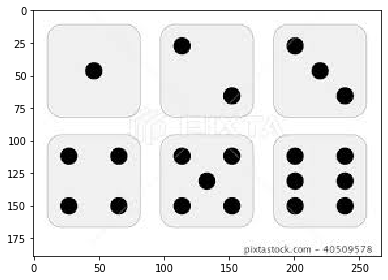

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io
wheels = io.imread('sample.jpg', as_gray=True)
io.imshow(wheels)
plt.show()

thres 0.505859375


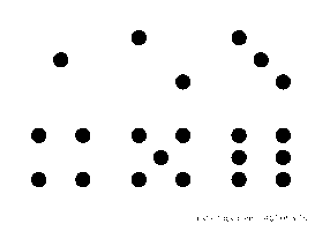

In [3]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
thres = threshold_otsu(wheels)
print('thres', thres)
wheels_thres = wheels >  thres
plt.imshow(wheels_thres, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
find_contours?

Object `find_contours` not found.


In [5]:
from skimage.measure import find_contours
contours = find_contours(wheels_thres, level=0.1 )
print(len(contours))


50


In [6]:
for c in contours:
    print(c.shape)

(53, 2)
(53, 2)
(53, 2)
(53, 2)
(55, 2)
(55, 2)
(53, 2)
(53, 2)
(53, 2)
(53, 2)
(55, 2)
(53, 2)
(53, 2)
(55, 2)
(53, 2)
(53, 2)
(53, 2)
(53, 2)
(53, 2)
(55, 2)
(53, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(7, 2)
(7, 2)
(11, 2)
(5, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(13, 2)
(5, 2)


In [7]:
# 大約要知道圖形大小
sorted([c.shape[0] for c in contours], reverse=True)
import numpy as np
np.sum(np.array([c.shape[0] for c in contours]) >50)

21

In [8]:
# 樣本檢視第0
contours[0].shape

(53, 2)

In [9]:
# 樣本檢視第  0 幾個圖像 (x, y) 座標
contours[0][:, 1], contours[0][:, 0] # 53, 53

(array([116.1, 117. , 118. , 118.1, 119. , 119.1, 119.1, 120. , 120.1,
        120.1, 120.1, 120.1, 120.1, 120. , 119.1, 119.1, 119. , 118.1,
        118. , 117. , 116.1, 116. , 115. , 114. , 113. , 112. , 111.9,
        111. , 110. , 109.9, 109. , 108.9, 108. , 107.9, 107.9, 107.9,
        107.9, 107.9, 107.9, 107.9, 108. , 108.9, 109. , 109.9, 110. ,
        110.9, 111. , 112. , 113. , 114. , 115. , 116. , 116.1]),
 array([33. , 32.1, 32.1, 32. , 31.1, 31. , 30. , 29.1, 29. , 28. , 27. ,
        26. , 25. , 24.9, 24. , 23. , 22.9, 22. , 21.9, 21.9, 21. , 20.9,
        20.9, 20.9, 20.9, 20.9, 21. , 21.9, 21.9, 22. , 22.9, 23. , 23.9,
        24. , 25. , 26. , 27. , 28. , 29. , 30. , 30.1, 31. , 31.1, 32. ,
        32.1, 33. , 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33. ]))

In [10]:
# 樣本檢視第 -1 幾個圖像 (x, y) 座標
contours[-1][:, 1], contours[-1][:, 0] # 5, 2

(array([259.1, 259. , 258.9, 259. , 259.1]),
 array([185. , 184.9, 185. , 185.1, 185. ]))

(53, 2)


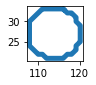

In [11]:
# 每一個圖框都可以繪製出邊界
print(contours[0].shape)
plt.figure(figsize=(1, 1))
plt.plot(contours[0][:, 1], contours[0][:, 0], linewidth=5)
plt.show()

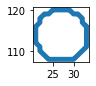

In [12]:
# 每一個圖框都可以繪製出邊界 注意要使用 (1, 0) 不是 (0, 1)
plt.figure(figsize=(1, 1))
plt.plot(contours[0][:, 0], contours[0][:, 1], linewidth=5)
plt.show()

In [13]:
def show_image_contour(image, contours, lower, upper):
    plt.figure()
    for n, contour in enumerate(contours):
        if upper > contour.shape[0] > lower:
            #print(n)       # 注意是 先 1 then  0
            plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='m')
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

def show_image_contour_err(image, contours, lower, upper):
    plt.figure()
    for n, contour in enumerate(contours):
        if upper > contour.shape[0] > lower:
            #print(n)       # 注意是 先 1 then  0 此處故意弄錯
            plt.plot(contour[:, 0], contour[:, 1], linewidth=2, color='m')
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title('Contours')
    plt.axis('off')
    plt.show()


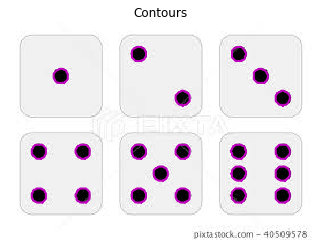

In [14]:
import matplotlib.pyplot as plt
show_image_contour(wheels, contours, 50, 60) # 圖框的大小範圍

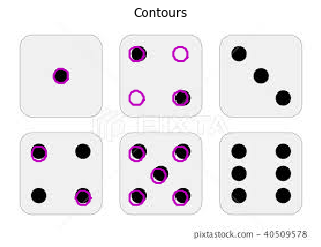

In [15]:
import matplotlib.pyplot as plt
show_image_contour_err(wheels, contours, 50, 60) # 故意出錯